## Chapter 02 -- Linear functions

Modified by kmp 2022

Sources:

https://web.stanford.edu/~boyd/vmls/

https://github.com/vbartle/VMLS-Companions

Based on "Boyd and Vandenberghe, 2021, Introduction to Applied Linear Algebra: Vectors, Matrices, and Least Squares - Julia Language Companion" https://web.stanford.edu/~boyd/vmls/vmls-julia-companion.pdf

### 2.1 Linear functions

**Functions in Julia.** Julia provides several methods for defining functions. A simple function given by an expression such as $f(x) = x_1 + x_2 − x^{2}_4$ can be defined in a single line, so-called **`short-form function definition`**.

In [ ]:
f(x::Vector)::Number = x[1] + x[2] - x[4]^2

In [ ]:
f([-1,0,1,2])

Since the function definition refers to the first, second, and fourth elements of the argument `x`, these have to be defined when you call or evaluate `f(x)`; you will get an error if, for example, `x` has dimension `3` or is a scalar.

**Superposition.** Suppose `a` is an `n`-vector. The function $f(x) = a^Tx$ is linear, which means that for any `n`-vectors `x` and `y`, and any scalars $α$ and $β$, the superposition equality holds.

$$f(αx+ βy) = αf(x) + βf(y)$$

Superposition says that evaluating $f$ at a linear combination of two vectors is the same forming the linear combination of $f$ evaluated at the two vectors. 

The inner product function $f$ for a specific value of `a`, and then verify superposition in Julia for specific values of $x, y, α$, and $β$. This check does not show that the function is linear. It simply checks that superposition holds for these specific values.

In [ ]:
a = [-2, 0, 1, -3]
f(x) = a'*x             # Inner product function

x = [2, 2, -1, 1]
y = [0, 1, -1, 0]
alpha = 1.5
beta = -3.7

lhs = f(alpha * x + beta * y)
rhs = alpha * f(x) + beta * f(y)

lhs, rhs, lhs == rhs

For the function $f(x) = a^Tx$, we have $f(e_3) = a_3$. Let’s check that this holds in our example.

In [ ]:
e1 = [1, 0, 0, 0]
e2 = [0, 1, 0, 0]
e3 = [0, 0, 1, 0]
e4 = [0, 0, 0, 1]
f(e1), f(e2), f(e3), f(e4)  # note a = [-2, 0, 1, -3]

**Examples.** Let us define the average function in Julia, and check its value for a specific vector. Julia’s **`Statistics`** package contains the average function, which is called **`mean`**.

https://github.com/JuliaStats

https://juliastats.org/

https://juliastats.org/StatsBase.jl/stable/

In [ ]:
avg(x) = (ones(length(x)) / length(x))'*x
x = [1, -3, 2, -1]
avg(x)

The average function can be implemented more concisely as `sum(x)/length(x)`. The `avg` function is part of the `VMLS` package; once you install and then add this package, you can use the `avg` function.

In [ ]:
sum(x)/length(x)

In [ ]:
using Statistics
mean(x)

### 2.2 Taylor approximation

**Taylor approximation.** The first-order Taylor approximation of a function $f$ : $R^n → R$, at the point $z$, is the affine function of $x$ given by

$$f̂(x) = f(z) +∇f(z)^T (x − z).$$

For $x$ near $z$, $f̂(x)$ is close to $f(x)$.

A numerical example using Julia:

In [ ]:
f(x) = x[1] + exp(x[2]-x[1])
grad_f(z) = [1-exp(z[2]-z[1]), exp(z[2]-z[1])]  # gradient of f at z

z = [1, 2]
f_hat(x) = f(z) + grad_f(z)'*(x-z)              # first-order Taylor approximation at z

delta = -0.02
x = z + delta*[2, 1]
f(x), f_hat(x), abs(f_hat(x) - f(x))                          # f and f_hat comparisons for some specific x’s

In [ ]:
f([1.10,2.11]), f_hat([1.10,2.11]), abs(f_hat([1.10,2.11]) - f([1.10,2.11]))

### 2.3 Regression model

The one-dimensional regression model is the affine function of $x$ given by, $f(x) = x^Tβ + v$, where the $n$-vector $β$ and the scalar $v$ are the parameters in the model. The one-dimensional regression model is used to approximate a real or observed value of the number $y$ that is associated with $x$. We will see later how to find the parameters in a regression model, using data.)

Here a simple one-dimensional regression model for house sale prices is defined and compare its prediction to the true house sale price $y$ for a few values of $x$.

In [ ]:
beta = [148.73, -18.85]; v = 54.40;     # known parameters
y_hat(x) = x'*beta + v;

# evaluate prediction
x = [0.846, 1]; y = 115;
y_hat(x), y

In [ ]:
x = [1.324,2]; y = 234.50;
y_hat(x), y

A scatter plot of predicted and actual house prices (Figure [2.4] in VMLS) can be generated as follows. We use the VMLS function house_sales_data to obtain the vectors price, area, beds (see appendix A).

https://github.com/VMLS-book/VMLS.jl

In [ ]:
using VMLS
D = house_sales_data()

In [ ]:
price = D["price"];

In [38]:
area = D["area"];

In [39]:
beds = D["beds"];

A better multiple regression model:

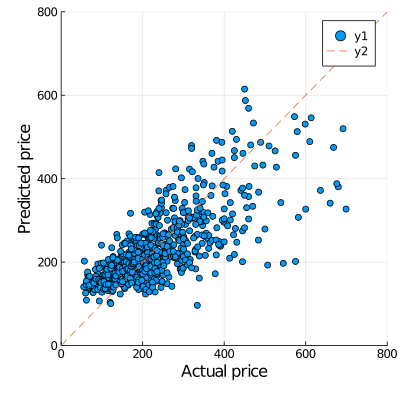

In [42]:
v = 54.4017;
beta = [147.7251, -18.8534];
predicted = v .+ beta[1] * area + beta[2] * beds;

using Plots

scatter(price, predicted, lims = (0,800))

plot!([0, 800], [0, 800], linestyle = :dash)

# make axes equal and add labels
plot!(xlims = (0,800), ylims = (0,800), size = (400,400))
plot!(xlabel = "Actual price", ylabel = "Predicted price")

**Figure 2.1** Scatter plot of actual and predicted sale prices for 774 houses sold in Sacramento during a five-day period.